# Linear Regression

The idea here is to fit the data points to a linear equation

> $ŷ = X w$

where $ŷ$ is a vector of predictions, $X$ represents the data points, and $w$ is a group of coefficients

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy.linalg import inv
from pathlib import Path
from src.features.build_features import *

## Data Processing

In [15]:
data_path = Path("./x11.txt")
df = pd.read_csv(data_path, sep='  ', index_col=0, skiprows=38, names=['index','rent_arable_acre', 'cows_mile^2', 'diff_pasture_arable', 'rent_grassy_acre'])

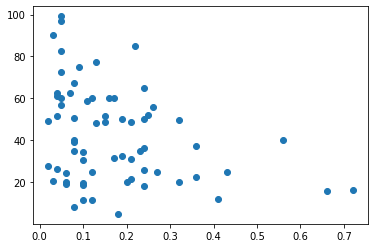

In [34]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.scatter(d[2,:], d[-1,:])
plt.show()

In [19]:
df_std = standardize_data(df)

In [20]:
X =  df_std[['rent_arable_acre', 'cows_mile^2', 'diff_pasture_arable']]
y = df_std['rent_grassy_acre']

In [30]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

## Arrays

In [18]:
def rmse(y, y_pred):
    return math.sqrt(np.sum(np.abs(y_pred - y)**2)/y.size)

In [35]:
y = d[-1].reshape(67,-1)
y[:10,:]

array([[18.38],
       [20.  ],
       [11.5 ],
       [25.  ],
       [62.5 ],
       [82.5 ],
       [25.  ],
       [30.67],
       [12.  ],
       [61.25]])

In [38]:
x = np.vstack((d[:-1], np.ones(n_rows))).T
x[:10,:]

array([[1.550e+01, 1.725e+01, 2.400e-01, 1.000e+00],
       [2.229e+01, 1.851e+01, 2.000e-01, 1.000e+00],
       [1.236e+01, 1.113e+01, 1.200e-01, 1.000e+00],
       [3.184e+01, 5.540e+00, 1.200e-01, 1.000e+00],
       [8.390e+01, 5.440e+00, 4.000e-02, 1.000e+00],
       [7.225e+01, 2.037e+01, 5.000e-02, 1.000e+00],
       [2.714e+01, 3.120e+01, 2.700e-01, 1.000e+00],
       [4.041e+01, 4.290e+00, 1.000e-01, 1.000e+00],
       [1.242e+01, 8.690e+00, 4.100e-01, 1.000e+00],
       [6.942e+01, 6.630e+00, 4.000e-02, 1.000e+00]])

In [39]:
x_train = x[:50]
x_test = x[50:]
y_train = y[:50]
y_test = y[50:]

## Normal Equation

We define a cost function, which will be in this case the sum of squared errors

>$J(w) = \sum (X w - y)^2$

Taking its derivative and making it equal to zero, we find values for the weights which minimize the cost function

> $X^T X w = X^T y$

can be solved for $w$ as

> $w = (X^T X)^{-1} X^T y$

In [41]:
def weights(x, y):
    return np.dot(np.dot(inv(np.dot(x.T, x)),x.T),y)

In [42]:
w = weights(x_train, y_train)
w

array([[  0.84562649],
       [  0.54721814],
       [-19.7026391 ],
       [ -2.03202577]])

In [43]:
rmse(y_test,np.dot(x_test,w))

10.863378363411924

## Gradient Descent

When the number of data points is too large, solving the normal equation might not be practical. We then perform simpler calculations to minimize the cost function step by step, updating the weights as we do it.

> $w = w + \alpha \nabla J(w)$

which is implemented in code as

> $w = w - \frac{\alpha}{m} X^T (Xw - y)$

where $\alpha$ is the learning rate, and $m$ is the number of examples in $X$

In [44]:
def normalized(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

In [45]:
x_norm = np.vstack((normalized(d[:-1],1), np.ones(n_rows))).T
x_norm[:10,:]

array([[0.03895235, 0.08237303, 0.13196578, 1.        ],
       [0.05601599, 0.08838984, 0.10997148, 1.        ],
       [0.03106136, 0.05314851, 0.06598289, 1.        ],
       [0.08001567, 0.02645488, 0.06598289, 1.        ],
       [0.21084531, 0.02597735, 0.0219943 , 1.        ],
       [0.18156822, 0.09727181, 0.02749287, 1.        ],
       [0.06820431, 0.14898774, 0.1484615 , 1.        ],
       [0.10155255, 0.02048581, 0.05498574, 1.        ],
       [0.03121214, 0.04149691, 0.22544153, 1.        ],
       [0.17445627, 0.0316599 , 0.0219943 , 1.        ]])

In [46]:
alpha = 0.5
#w = np.random.rand(x.shape[1],1)
w = np.ones(x.shape[1]).reshape(-1,1)
#w = np.array([[0.84562649],[0.54721814],[-19.7026391 ],[-2.03202577]])
w

array([[1.],
       [1.],
       [1.],
       [1.]])

In [47]:
x_train = x_norm[:50]
x_test = x_norm[50:]
y_train = y[:50]
y_test = y[50:]

m = x_train.shape[0]

In [48]:
rmse_new = np.inf
for i in range(100000):
    w = w - (alpha/m)*np.dot(x_train.T, np.dot(x_train, w)-y_train)
    rmse_old = rmse_new
    rmse_new = rmse(y_test,np.dot(x_test,w))
    if (rmse_new > rmse_old):
        print("Stopped at iteration {}".format(i))
        break
w

Stopped at iteration 48796


array([[336.49343619],
       [114.59470086],
       [-35.83227056],
       [ -2.03202577]])

In [49]:
rmse(y_test,np.dot(x_test,w))

10.86337836342186